<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/JARVIS_DFT_2D_High_throughput_Identification_and_Characterization_of_Two_dimensional_Materials_using_Density_functional_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference:
[High-throughput Identification and Characterization of Two-dimensional Materials using Density functional theory](https://www.nature.com/articles/s41598-017-05402-0)

In [1]:
!pip install jarvis-tools matplotlib-venn

     |████████████████████████████████| 962 kB 8.0 MB/s 
     |████████████████████████████████| 325 kB 44.0 MB/s 


In [44]:
from jarvis.db.figshare import data,get_jid_data
import pandas as pd
dft_3d=data('dft_3d')
dft3d=pd.DataFrame(dft_3d)

dft_2d=data('dft_2d')
dft2d=pd.DataFrame(dft_2d)

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.
Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.


In [26]:
import numpy as np
df3d_exf=df3d[['jid','spg_number','formula','crys','exfoliation_energy','optb88vdw_bandgap','formation_energy_peratom']].replace('na',np.nan).dropna()

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


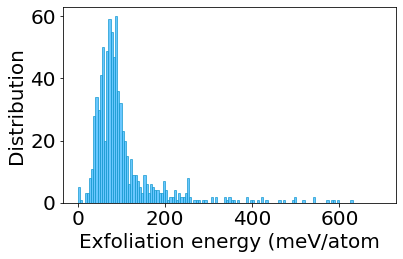

In [23]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20})
plt.rcParams["font.family"] = "Times New Roman"
plt.hist(df3d_exf['exfoliation_energy'],bins=np.arange(0,700 , 5),facecolor = '#2ab0ff', edgecolor='#169acf',alpha=0.7)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.xlabel('Exfoliation energy (meV/atom')
plt.ylabel('Distribution')
plt.tight_layout()

In [29]:
from jarvis.core.composition import Composition
chalcogen=[] #O,S,Se,Te,Po
halogen=[]#F,Cl,Br,I,At
pnictogen=[]#N,P,As,Sb,Bi
spg=[]
crys=[]
for i,ii in df3d_exf.iterrows():
  if  ii['exfoliation_energy']<200:
    spg.append(int(ii['spg_number']))
    crys.append(ii['crys'])
    comp=Composition.from_string(ii['formula']).to_dict()
    if set(['O','S','Se','Te','Po']).intersection(set(comp.keys())):
      chalcogen.append(ii['jid'])
    if set(["F","Cl","Br","I","At"]).intersection(set(comp.keys())):
      halogen.append(ii['jid'])
    if set(['N','P','As','Sb','Bi']).intersection(set(comp.keys())):
      pnictogen.append(ii['jid'])

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


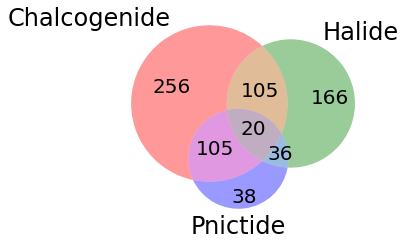

In [31]:
from matplotlib_venn import venn3, venn3_circles
venn3([set(chalcogen), set(halogen), set(pnictogen)], ('Chalcogenide', 'Halide', 'Pnictide'))

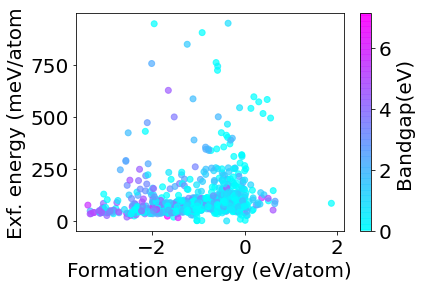

In [37]:
plt.scatter(df3d_exf['formation_energy_peratom'],df3d_exf['exfoliation_energy'],c=df3d_exf['optb88vdw_bandgap'],alpha=.7,cmap='cool')
plt.xlabel('Formation energy (eV/atom)')
plt.ylabel('Exf. energy (meV/atom')
cbar=plt.colorbar()
cbar.set_label('Bandgap(eV)', rotation=90)

In [50]:
dft2d['ref']=dft2d['reference'].apply(lambda x: x.split('-1L')[0])
dft3d['ref']=dft3d['reference']

In [71]:
import pandas as pd
import numpy as np
df_both=pd.merge(dft2d,dft3d,on='ref')
df_both2=df_both[['jid_x','jid_y','optb88vdw_bandgap_x','optb88vdw_bandgap_y','exfoliation_energy_x','formation_energy_peratom_x','formation_energy_peratom_y']].replace('na',np.nan).dropna()

Text(0, 0.5, 'Bandgap in 2D(eV)')

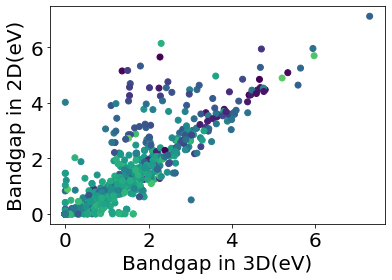

In [72]:
plt.scatter(df_both2['optb88vdw_bandgap_x'],df_both2['optb88vdw_bandgap_y'],c=df_both2['formation_energy_peratom_x'])
plt.xlabel('Bandgap in 3D(eV)')
plt.ylabel('Bandgap in 2D(eV)')

Text(0, 0.5, 'Form. energy in 2D(eV/atom)')

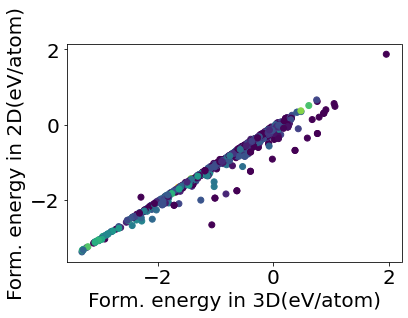

In [73]:
plt.scatter(df_both2['formation_energy_peratom_x'],df_both2['formation_energy_peratom_y'],c=df_both2['optb88vdw_bandgap_x'])
plt.xlabel('Form. energy in 3D(eV/atom)')
plt.ylabel('Form. energy in 2D(eV/atom)')

In [74]:
df_both2

,jid_x,jid_y,optb88vdw_bandgap_x,optb88vdw_bandgap_y,exfoliation_energy_x,formation_energy_peratom_x,formation_energy_peratom_y
0,JVASP-13526,JVASP-12164,4.067,3.590,77.176625,-1.88687,-1.96405
4,JVASP-60460,JVASP-29574,2.548,2.290,92.649512,-0.36479,-0.45744
5,JVASP-14441,JVASP-12047,0.000,0.000,66.602333,-0.92474,-0.99134
7,JVASP-60253,JVASP-60627,0.000,0.000,59.609875,-0.48061,-0.54021
9,JVASP-13588,JVASP-60631,0.000,0.000,34.810833,-1.41346,-1.44828
...,...,...,...,...,...,...,...
1201,JVASP-60442,JVASP-29539,2.639,2.259,88.739117,-0.57107,-0.65981
1202,JVASP-60447,JVASP-29548,0.605,0.453,97.276455,-0.46680,-0.56408
1205,JVASP-60464,JVASP-12138,0.872,0.574,78.656850,-0.06583,-0.14449
1206,JVASP-60467,JVASP-12028,2.883,2.310,77.390250,-0.75238,-0.82977
